In [1]:
import os
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

import sys
sys.path.append("../")

from aeon.visualisation import plot_critical_difference

/Users/bzcschae/miniconda3/lib/python3.10/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [15]:
path = "TLB_logs/"
# file = "tlb_all_ucr_16_8-28-02-24.csv"
file = "tlb_all_ucr_16_256-28-02-24.csv"
# file = "tlb_all_ucr_8_8-28-02-24.csv"

df = pd.read_csv(path + file)

mapping = {"sfa_equi-depth_False": "SFA Equi-Depth",
           "sfa_equi-depth_True": "SFA Equi-Depth +Variance",
           "sfa_equi-width_False": "SFA Equi-Width",
           "sfa_equi-width_True": "SFA Equi-Width +Variance",
           "isax": "iSAX",
           }

for key in mapping:
    df.Method = df.Method.replace({key: mapping[key]})
    
df

,Method,Dataset,TLB
0,iSAX,ArrowHead,0.017057
1,iSAX,ArrowHead,0.041850
2,iSAX,ArrowHead,0.066904
3,iSAX,ArrowHead,0.089040
4,iSAX,ArrowHead,0.113600
...,...,...,...
190475,SFA Equi-Depth,Yoga,0.958114
190476,SFA Equi-Depth,Yoga,0.961399
190477,SFA Equi-Depth,Yoga,0.964625
190478,SFA Equi-Depth,Yoga,0.967927


In [21]:
df[df.TLB>1]

,Method,Dataset,TLB
245,iSAX,Chinatown,1.017380
18130,iSAX,ItalyPowerDemand,1.006731
18131,iSAX,ItalyPowerDemand,1.023010
18132,iSAX,ItalyPowerDemand,1.037552
18133,iSAX,ItalyPowerDemand,1.052536


In [16]:
df[["Method", "TLB"]].groupby("Method").median().sort_values(by="TLB", ascending=False)

,TLB
Method,
SFA Equi-Width +Variance,0.324765
SFA Equi-Depth +Variance,0.321607
SFA Equi-Width,0.314725
SFA Equi-Depth,0.311769
iSAX,0.294881


In [18]:
df[["Method", "TLB"]].groupby("Method").max().sort_values(by="TLB", ascending=False)

,TLB
Method,
iSAX,1.052536
SFA Equi-Width,0.982717
SFA Equi-Width +Variance,0.982717
SFA Equi-Depth,0.971094
SFA Equi-Depth +Variance,0.971094


In [20]:
df[df["TLB"]>1] # ["Method", "TLB]

,Method,Dataset,TLB
245,iSAX,Chinatown,1.017380
18130,iSAX,ItalyPowerDemand,1.006731
18131,iSAX,ItalyPowerDemand,1.023010
18132,iSAX,ItalyPowerDemand,1.037552
18133,iSAX,ItalyPowerDemand,1.052536


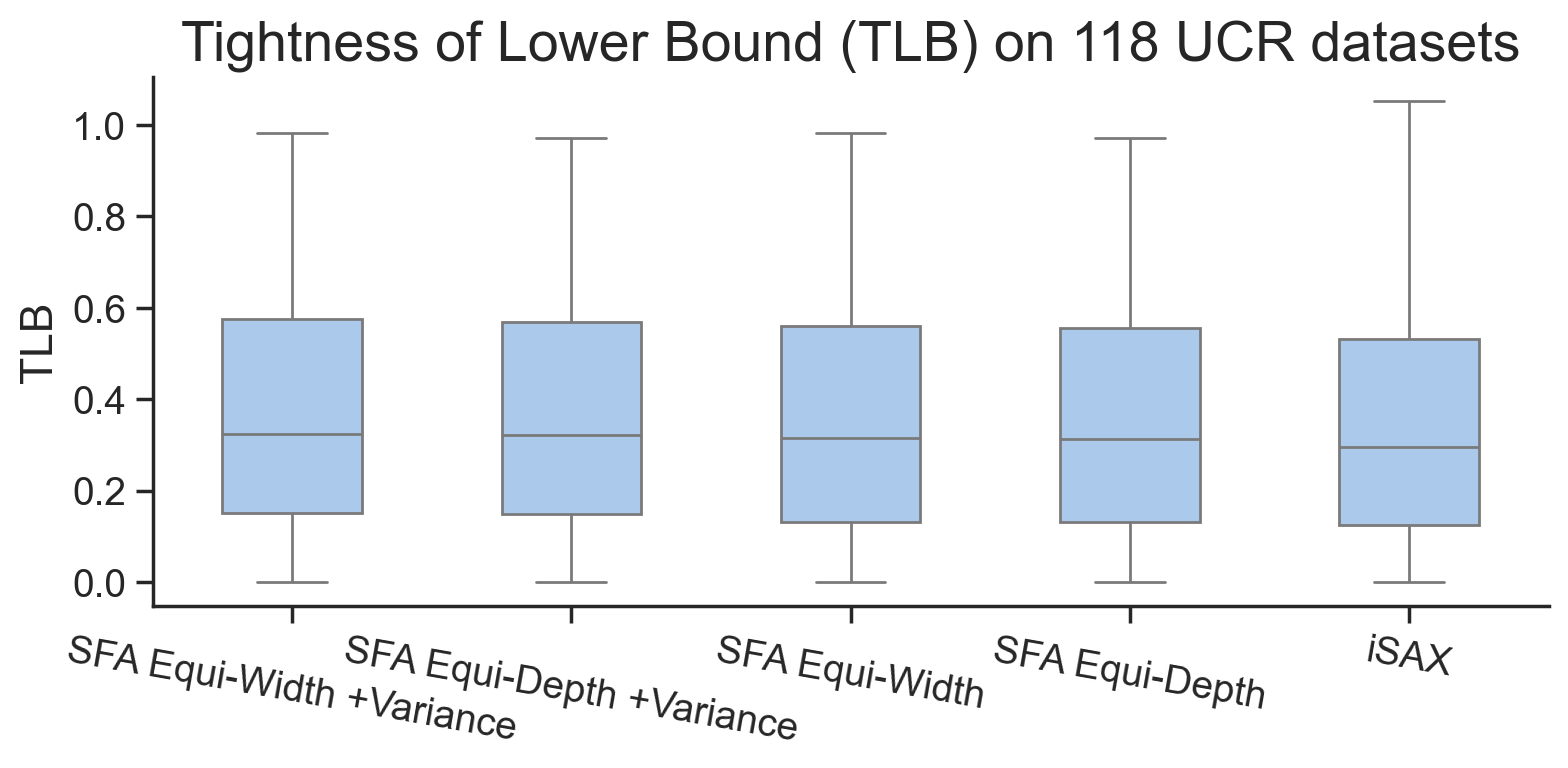

In [17]:
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(
    x="Method", y="TLB", data=df, width=.5,
    order=df[["Method", "TLB"]].groupby("Method").median().sort_values(by="TLB", ascending=False).reset_index()["Method"], ax=ax)
ax.set_title("Tightness of Lower Bound (TLB) on 118 UCR datasets", fontsize=20)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-10, fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel("TLB", fontsize=16)
ax.set_xlabel("")
sns.despine()
# plt.show()
plt.tight_layout()
plt.savefig("images/tlb_boxplot.pdf", bbox_inches='tight')

In [14]:
df_pivot = df.pivot_table(index="Dataset", columns=["Method"], values=["TLB"])
df_pivot.reset_index(drop=True)
df_pivot.columns = df_pivot.columns.get_level_values(1)
df_pivot = df_pivot.round(4)
display(df_pivot)
# df_pivot.describe()

Method,SFA Equi-Depth,SFA Equi-Depth +Variance,SFA Equi-Width,SFA Equi-Width +Variance,iSAX
Dataset,,,,,
ArrowHead,0.3195,0.3336,0.3462,0.3602,0.2330
BME,0.3666,0.3666,0.3662,0.3662,0.3195
Beef,0.1654,0.1627,0.1879,0.1878,0.1502
BeetleFly,0.2575,0.2887,0.2897,0.3165,0.2259
BirdChicken,0.3695,0.3769,0.4034,0.4087,0.3297
...,...,...,...,...,...
Wine,0.2616,0.2543,0.2401,0.2189,0.0450
WordSynonyms,0.3405,0.3405,0.3385,0.3385,0.2870
Worms,0.1282,0.1282,0.1274,0.1274,0.1206


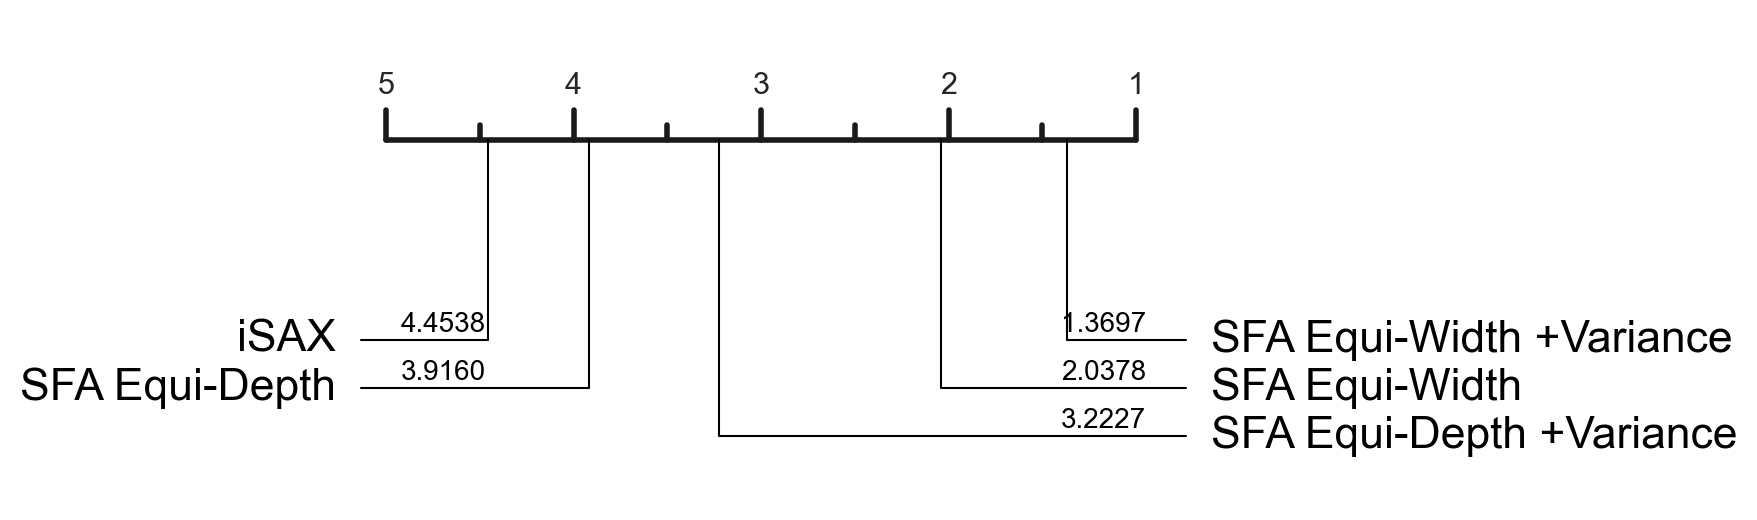

In [26]:
ax = plot_critical_difference(
    scores=df_pivot.to_numpy(),
    labels=df_pivot.columns.to_numpy(),
    #errors=False,
    #clique_method="holm",
    alpha=0.05,
)
#plt.tight_layout()
plt.savefig("images/cd_diagramm.pdf", bbox_inches='tight')

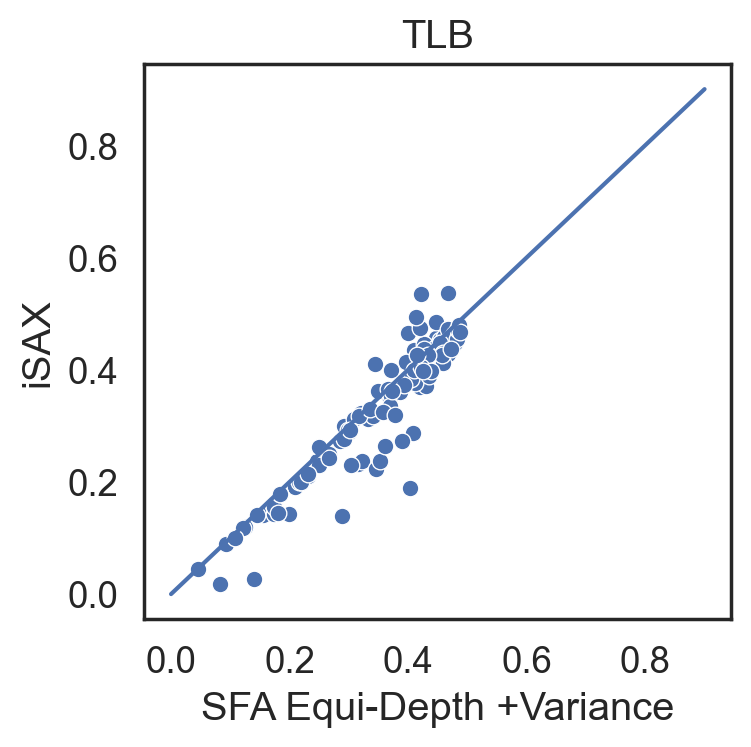

In [7]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Depth +Variance"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ed_isax.pdf", bbox_inches='tight')

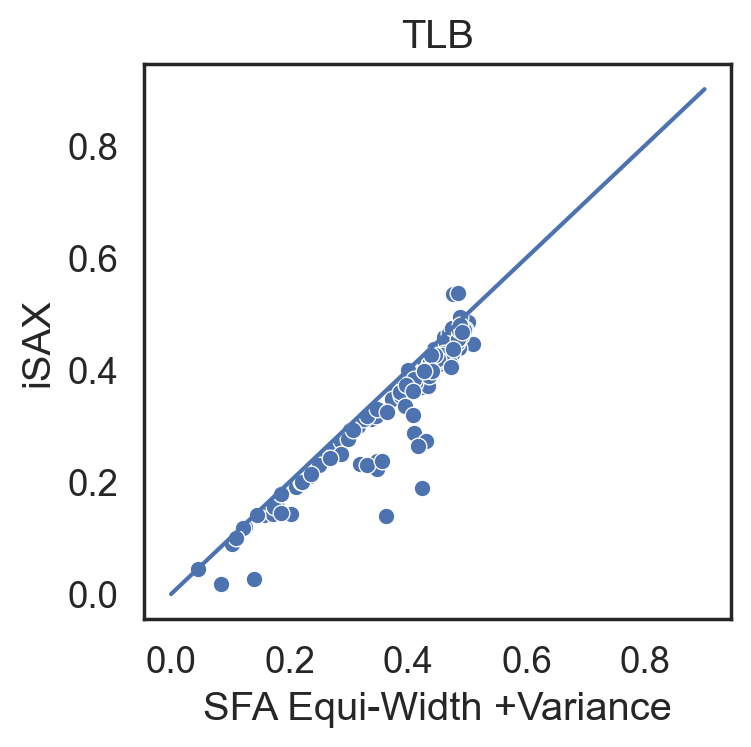

In [8]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_isax.pdf", bbox_inches='tight')

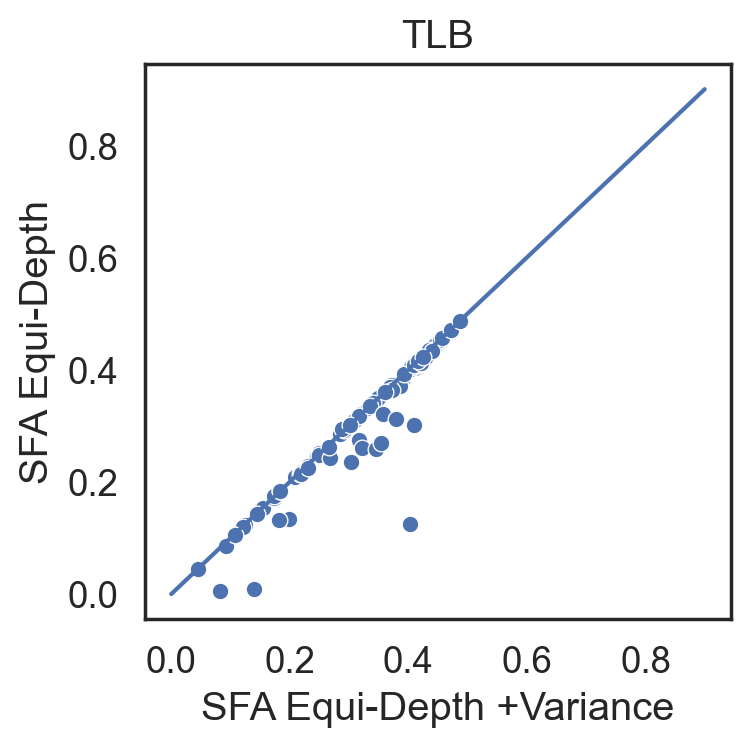

In [9]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Depth +Variance"
key2 = "SFA Equi-Depth"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ed_sfa_novar.pdf", bbox_inches='tight')

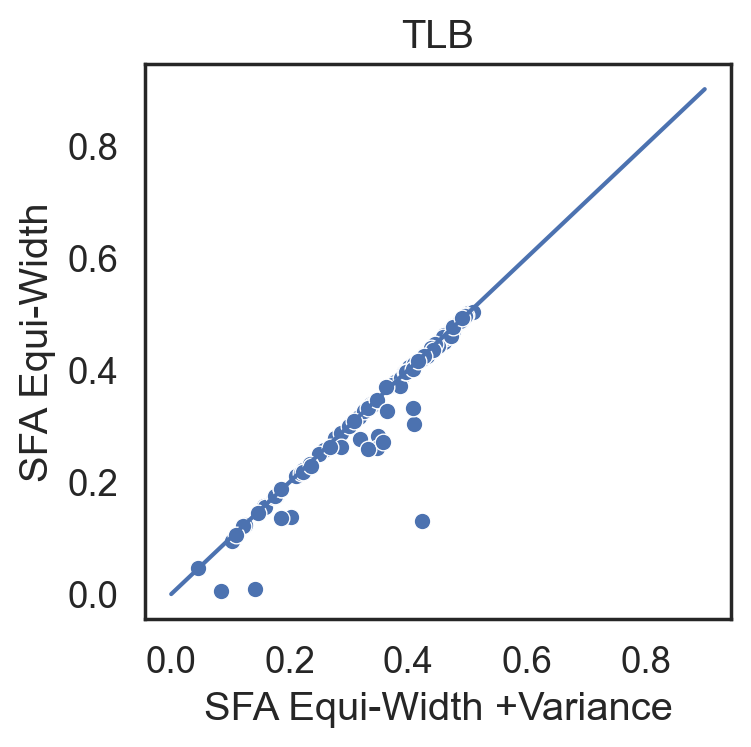

In [10]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
key2 = "SFA Equi-Width"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_sfa_novar.pdf", bbox_inches='tight')

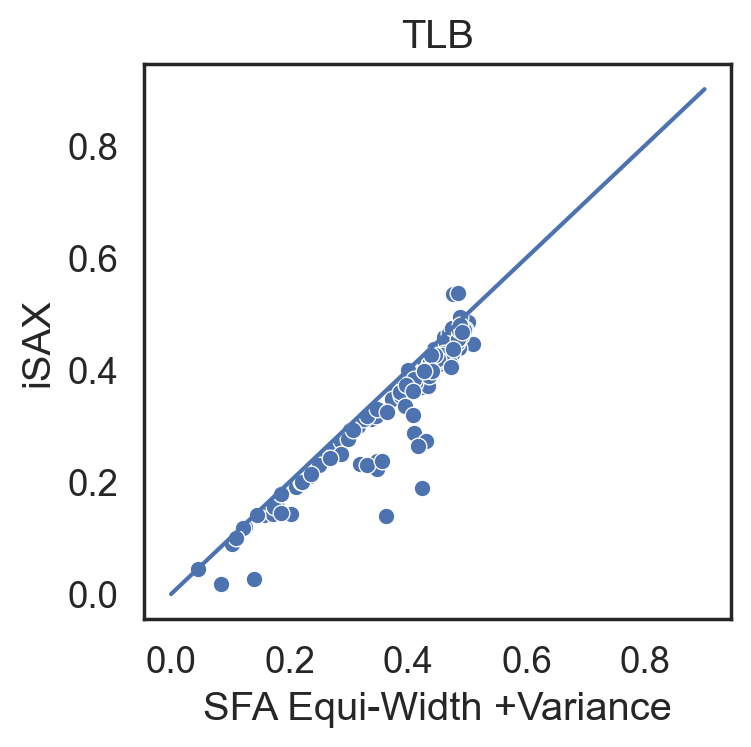

In [11]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_isax.pdf", bbox_inches='tight')

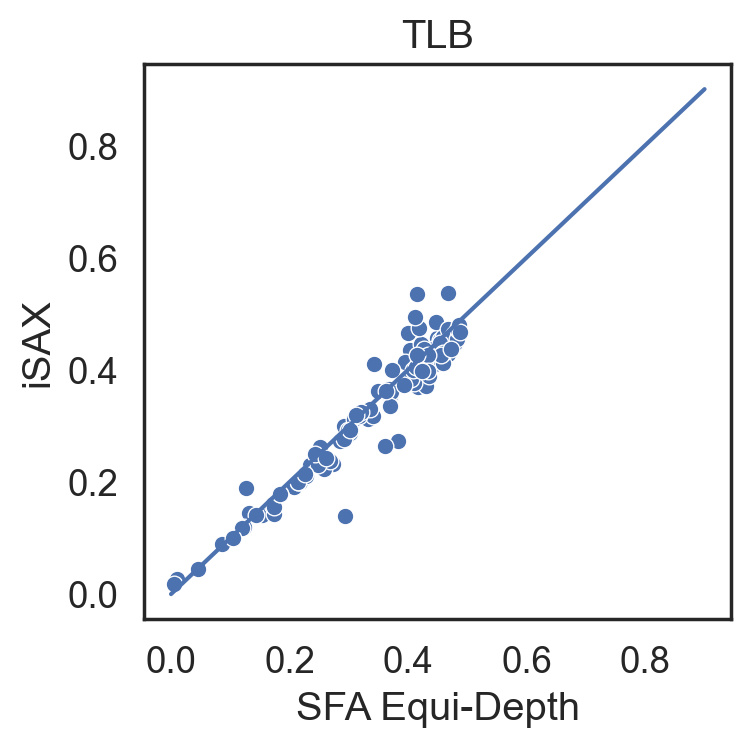

In [12]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Depth"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_ed_isax.pdf", bbox_inches='tight')

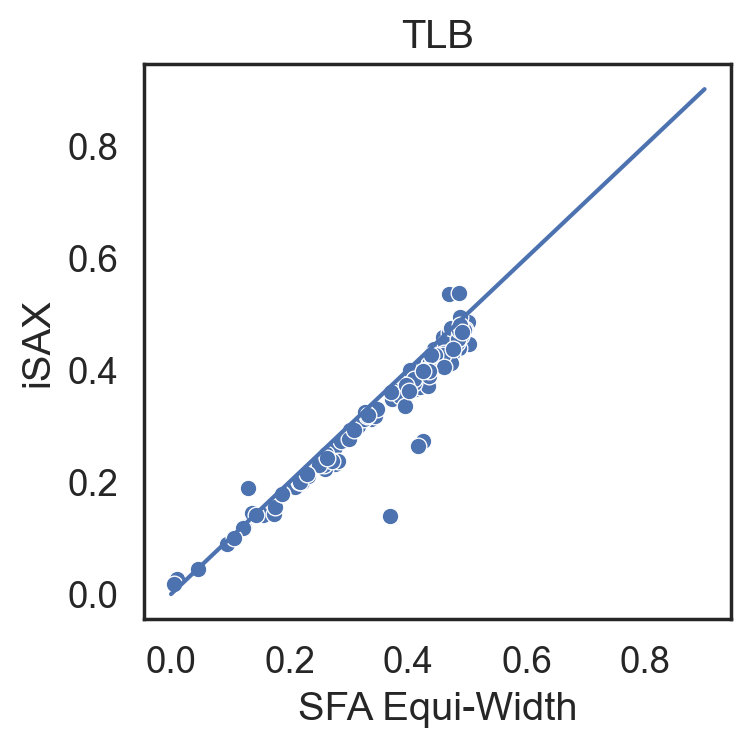

In [13]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_ew_isax.pdf", bbox_inches='tight')

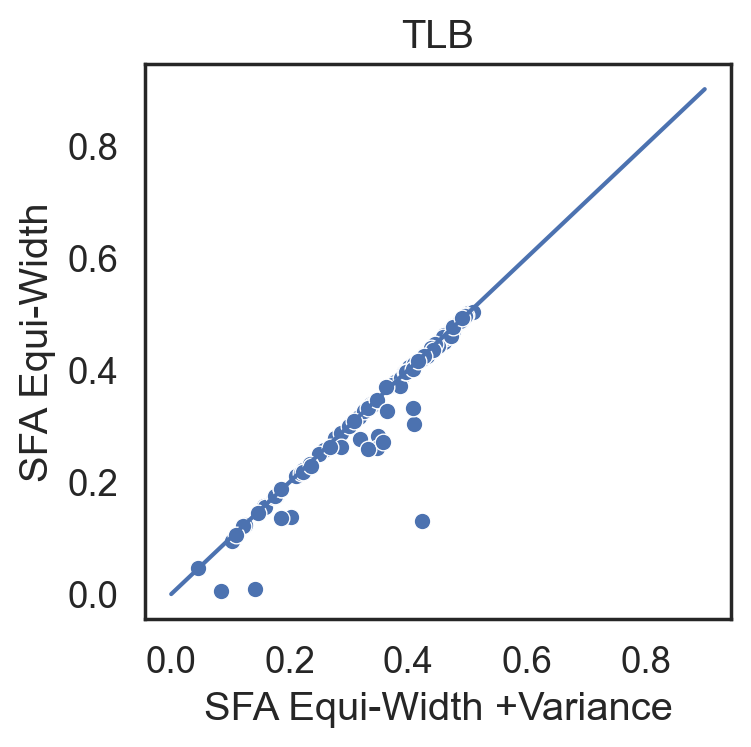

In [14]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
key2 = "SFA Equi-Width"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_sfa_novar_ew.pdf", bbox_inches='tight')

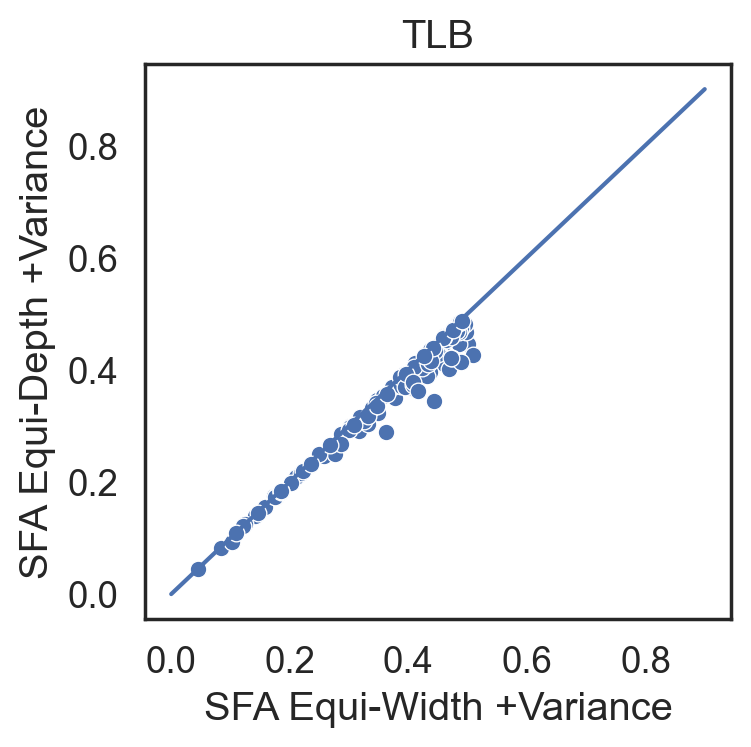

In [15]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
key2 = "SFA Equi-Depth +Variance"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_sfa_var_ed.pdf", bbox_inches='tight')